<a href="https://colab.research.google.com/github/ricardoburneo15/tesisfinal/blob/main/ResultadosTesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Librerías Necesarias

In [166]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.discrete.discrete_model import Logit
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.discrete.discrete_model as dm
!pip install imbalanced-learn

**Obtener Información General del DataFrame**

In [167]:
#Cargar datos
df = pd.read_csv("/content/drive/MyDrive/TESIS /Data/df_25.csv", sep=',')

#Analizar el conjunto de datos
df.head()

,anio,expediente,posicion_general,cia_imvalores,id_estado_financiero,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,...,C_springate,D_springate,Springate_Score,springate_dummy,categoria_springate,z2_dummy,categoria_z2score,CA_Score,ca_dummy,categoria_ca_score
0,2022,166548,3913.0,0,2138803.0,141631.93,9560281.99,2594204.84,-223056.07,0.00,...,-0.266836,0.014815,-0.302290,0,quiebra,1,quiebra,-1.611319,0,quiebra
1,2022,143844,3974.0,0,2068027.0,316000.01,9843808.92,1149600.82,274989.80,62300.11,...,0.031629,0.032101,-0.788475,0,quiebra,1,quiebra,-2.084257,0,quiebra
2,2022,703768,4022.0,0,2114120.0,540692.65,9382854.04,1433381.00,-63383.29,0.00,...,-0.012656,0.057626,0.219365,0,quiebra,0,no quiebra,-2.067977,0,quiebra
3,2022,73557,4219.0,0,2094371.0,283815.06,8825486.74,1823640.10,91691.55,20387.01,...,inf,0.032159,inf,1,no quiebra,1,quiebra,-1.753383,0,quiebra
4,2022,123105,4246.0,0,2157023.0,185718.33,8528954.37,2540369.08,32662.58,8070.59,...,0.272707,0.021775,0.202188,0,quiebra,1,quiebra,-1.367813,0,quiebra


# Analisis Exploratorio

Valores únicos y sus conteos en la variable 'target':
target
0.0    203463
1.0      9948
Name: count, dtype: int64

Proporción de cada valor en la variable 'target':
target
0.0    0.953386
1.0    0.046614
Name: proportion, dtype: float64


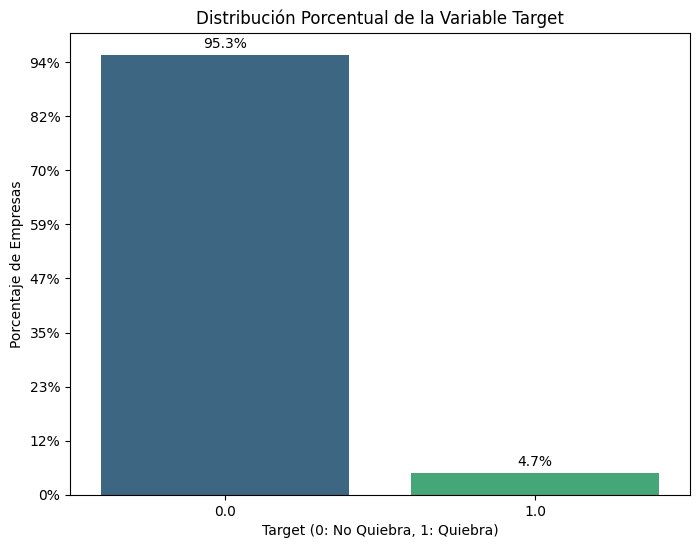

In [168]:
import matplotlib.ticker as mtick

print("Valores únicos y sus conteos en la variable 'target':")
print(df['target'].value_counts())
print("\nProporción de cada valor en la variable 'target':")
print(df['target'].value_counts(normalize=True))

# Visualizar la distribución de la variable target en porcentajes
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribución Porcentual de la Variable Target')
plt.xlabel('Target (0: No Quiebra, 1: Quiebra)')
plt.ylabel('Porcentaje de Empresas')

total = len(df['target']) # Obtener el total de empresas para calcular porcentajes
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total))

# Añadir los valores en la parte superior de cada barra
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Numero de empresas por año

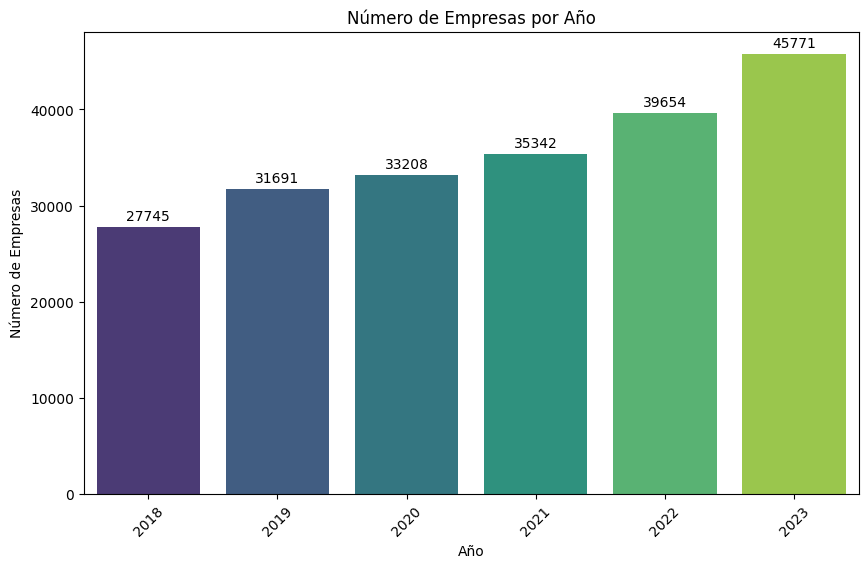

In [169]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='anio', data=df, palette='viridis')
plt.title('Número de Empresas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Empresas')
plt.xticks(rotation=45)

# Añadir los valores en la parte superior de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Distribución Porcentual de Empresas por Segmento

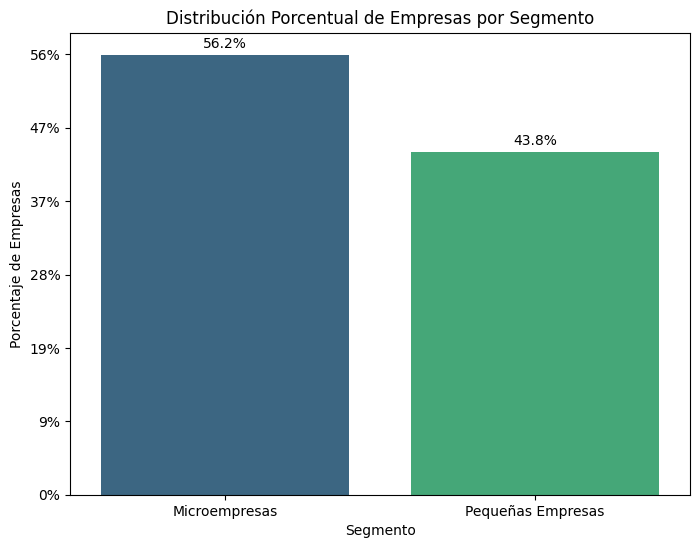

In [170]:
import matplotlib.ticker as mtick

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='cod_segmento', data=df, palette='viridis')
plt.title('Distribución Porcentual de Empresas por Segmento')
plt.xticks([0, 1], ['Microempresas', 'Pequeñas Empresas'])
plt.xlabel('Segmento')
plt.ylabel('Porcentaje de Empresas')

total = len(df) # Obtener el total de empresas para calcular porcentajes
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total))

# Añadir los valores en la parte superior de cada barra
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Porcentaje de Empresas en Insolvencia por Tamaño de Segmento

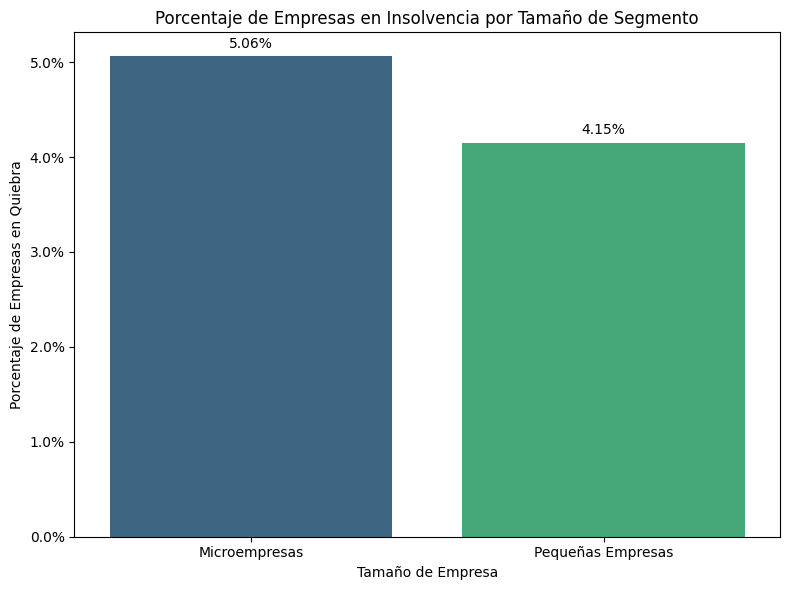

In [104]:
# Calcular el porcentaje de empresas en quiebra por segmento
# Usamos df_modelado que ya contiene las columnas necesarias y ha pasado por limpieza.
insolvencia_por_segmento = df.groupby('cod_segmento')['target'].value_counts(normalize=True).unstack() * 100

# Seleccionar solo el porcentaje de quiebra (target = 1) y resetear el índice
# Si no hay quiebras en un segmento, el valor será NaN, lo rellenamos con 0.
porcentaje_quiebra = insolvencia_por_segmento.get(1.0, pd.Series(0, index=insolvencia_por_segmento.index)).reset_index()
porcentaje_quiebra.columns = ['cod_segmento', 'Porcentaje_Quiebra']

# Mapear los nombres de los segmentos para una mejor visualización
segmento_map = {1.0: 'Microempresas', 2.0: 'Pequeñas Empresas'}
porcentaje_quiebra['Segmento'] = porcentaje_quiebra['cod_segmento'].map(segmento_map)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Segmento', y='Porcentaje_Quiebra', data=porcentaje_quiebra, palette='viridis')
plt.title('Porcentaje de Empresas en Insolvencia por Tamaño de Segmento')
plt.xlabel('Tamaño de Empresa')
plt.ylabel('Porcentaje de Empresas en Quiebra')

# Formatear el eje Y como porcentajes
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Añadir etiquetas de porcentaje sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10)

plt.tight_layout()
plt.show()

# Distribución Porcentual de Empresas por Sector (CIIU N1)

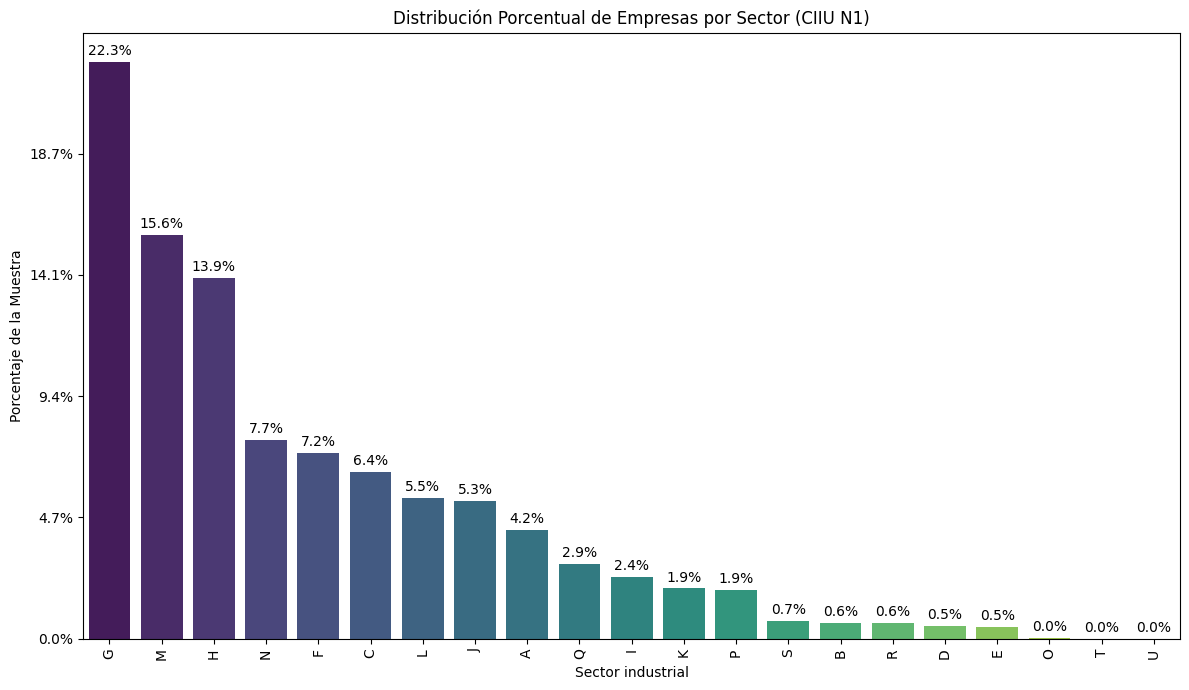

In [105]:
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 7))
total = len(df) # Total de observaciones

# Crear el gráfico base
ax = sns.countplot(x='ciiu_n1', data=df, palette='viridis',
                   order=df['ciiu_n1'].value_counts().index)

# --- ESTO CAMBIA EL EJE Y A PORCENTAJE ---
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total))

plt.title('Distribución Porcentual de Empresas por Sector (CIIU N1)')
plt.xlabel('Sector industrial')
plt.ylabel('Porcentaje de la Muestra')
plt.xticks(rotation=90)

# Añadir etiquetas de porcentaje sobre las barras
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [106]:
df_modelado = df.copy()

# Comparación de la Capacidad de Detección de Riesgo por Modelo

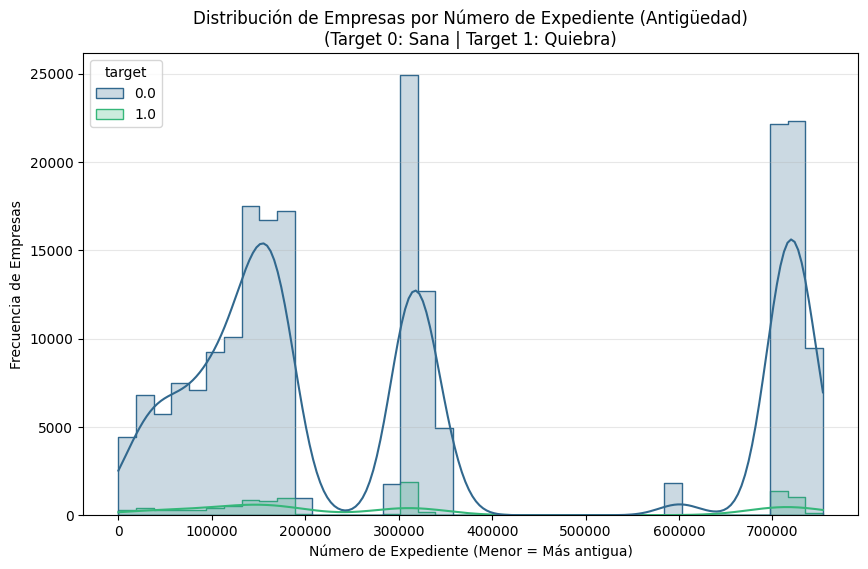

In [107]:
# Supongamos que tienes una columna 'Fecha_Constitucion'. Si no, el expediente sirve como proxy.
# Vamos a ver la distribución de los expedientes según el estado legal
plt.figure(figsize=(10, 6))
sns.histplot(data=df_modelado, x='expediente', hue='target', kde=True, palette='viridis', element="step")

plt.title('Distribución de Empresas por Número de Expediente (Antigüedad)\n(Target 0: Sana | Target 1: Quiebra)')
plt.xlabel('Número de Expediente (Menor = Más antigua)')
plt.ylabel('Frecuencia de Empresas')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Transformación de los scores

# Transformación de la variable dicotomica

In [108]:
# --- 1. ALTMAN Z2 (Binario) ---
condiciones_z2 = [
    (df_modelado['Z2 Score'] < 2.59),
    (df_modelado['Z2 Score'] >= 2.59)
]
valores_z2 = ['Riesgo', 'No Riesgo']
# Agregamos default para evitar el TypeError
df_modelado['Z2_Bin'] = np.select(condiciones_z2, valores_z2, default='Desconocido')

# --- 2. CA-SCORE (Binario) ---
condiciones_ca = [
    (df_modelado['CA_Score'] < 0.3),
    (df_modelado['CA_Score'] >= 0.3)
]
valores_ca = ['Riesgo', 'No Riesgo']
df_modelado['CA_Bin'] = np.select(condiciones_ca, valores_ca, default='Desconocido')

# --- 3. SPRINGATE (Binario) ---
condiciones_springate = [
    (df_modelado['Springate_Score'] <= 0.862),
    (df_modelado['Springate_Score'] > 0.862)
]
valores_springate = ['Riesgo', 'No Riesgo']
df_modelado['Springate_Bin'] = np.select(condiciones_springate, valores_springate, default='Desconocido')

In [109]:
#tabla cruzada entre Altman y CA-Score
tabla_contingencia = pd.crosstab(df_modelado['Z2_Bin'], df_modelado['CA_Bin'])

print("Tabla de Contingencia (Altman vs CA-Score):")
print(tabla_contingencia)

Tabla de Contingencia (Altman vs CA-Score):
CA_Bin     No Riesgo  Riesgo
Z2_Bin                      
No Riesgo      82403   26452
Riesgo          9411   95145


# Distribución de Empresas por Número de Expediente (Antigüedad)

# Distribución de la Variable Target

In [110]:
print("Valores únicos y sus conteos en la variable 'target':")
print(df['situacion_legal'].value_counts())


Valores únicos y sus conteos en la variable 'target':
situacion_legal
ACTIVA                                                203403
DISOLUCIÓN Y LIQUIDACIÓN OFICIO INSCRITA EN RM          6189
DISOLUCIÓN Y LIQUIDACIÓN OFICIO NO INSCRITA EN RM       2549
DISOLUCIÓN Y LIQUIDACIÓN ANTICIPADA INSCRITA RM          580
DISOLUCIÓN Y LIQUIDACIÓN DE PLENO DERECHO INSC. RM       497
INACTIVA                                                  60
DISOLUCIÓN Y LIQUIDACIÓ DE PLENO DERECHO NO INS RM        53
CANCELACIÓN PERMISO OPERACIÓN - OFICIO INSCRITA RM        45
DISOLUCIÓN Y LIQUIDACIÓN ANTIC. NO INSCRITA EN RM         18
CANCELACIÓN PERMISO OPERACIÓN - VOLUNT INSCRITA RM        10
CANCELACIÓN PERMISO OPERACIÓN - OFICIO NO INSCRITA         6
CANCELACIÓN PERMISO OPERACIÓN - VOLUNT NO INSCRITA         1
Name: count, dtype: int64


# Calculo de los umbrales

In [111]:
# --- 1. Clasificación Z2 SCORE (Altman) ---
# 1 = No saludable (Riesgo), 2 = Gris, 3 = Segura
condiciones_z2 = [
    (df_modelado['Z2 Score'] < 1.10),
    (df_modelado['Z2 Score'] >= 1.10) & (df_modelado['Z2 Score'] <= 2.59),
    (df_modelado['Z2 Score'] > 2.59)
]
valores_z2 = [1, 2, 3]
df_modelado['Z2_Cat'] = np.select(condiciones_z2, valores_z2, default=np.nan)

# --- 2. Clasificación CA SCORE ---
# 1 = Riesgo máximo, 2 = Zona indeterminada, 3 = Riesgo mínimo
condiciones_ca = [
    (df_modelado['CA_Score'] <= -0.3),
    (df_modelado['CA_Score'] > -0.3) & (df_modelado['CA_Score'] < 0.3),
    (df_modelado['CA_Score'] >= 0.3)
]
valores_ca = [1, 2, 3]
df_modelado['CA_Cat'] = np.select(condiciones_ca, valores_ca, default=np.nan)

# --- 3. Clasificación SPRINGATE ---
# 1 = Insolvente, 3 = Solvente
condiciones_springate = [
    (df_modelado['Springate_Score'] <= 0.862),
    (df_modelado['Springate_Score'] > 0.862)
]
valores_springate = [1, 3]
df_modelado['Springate_Cat'] = np.select(condiciones_springate, valores_springate, default=np.nan)

# Distribución de Frecuencias por Clasificación de Riesgo

In [112]:
#Comparación Z2 Score
tabla_z2 = pd.crosstab(df_modelado['target'], df_modelado['Z2_Bin'], margins=True, normalize='index') * 100
print("Análisis Comparativo Z2 Score (En %):")
print(tabla_z2)

tabla_ca = pd.crosstab(df_modelado['target'], df_modelado['CA_Bin'], margins=True, normalize='index') * 100
print("Análisis Comparativo ca score(En %):")
print(tabla_ca)

tabla_sp = pd.crosstab(df_modelado['target'], df_modelado['Springate_Bin'], margins=True, normalize='index') * 100
print("Análisis Comparativo ca score(En %):")
print(tabla_sp)

Análisis Comparativo Z2 Score (En %):
Z2_Bin  No Riesgo     Riesgo
target                      
0.0     51.163602  48.836398
1.0     47.808605  52.191395
All     51.007211  48.992789
Análisis Comparativo ca score(En %):
CA_Bin  No Riesgo     Riesgo
target                      
0.0     43.210313  56.789687
1.0     39.173703  60.826297
All     43.022150  56.977850
Análisis Comparativo ca score(En %):
Springate_Bin  No Riesgo     Riesgo
target                             
0.0            53.240638  46.759362
1.0            46.712907  53.287093
All            52.936353  47.063647


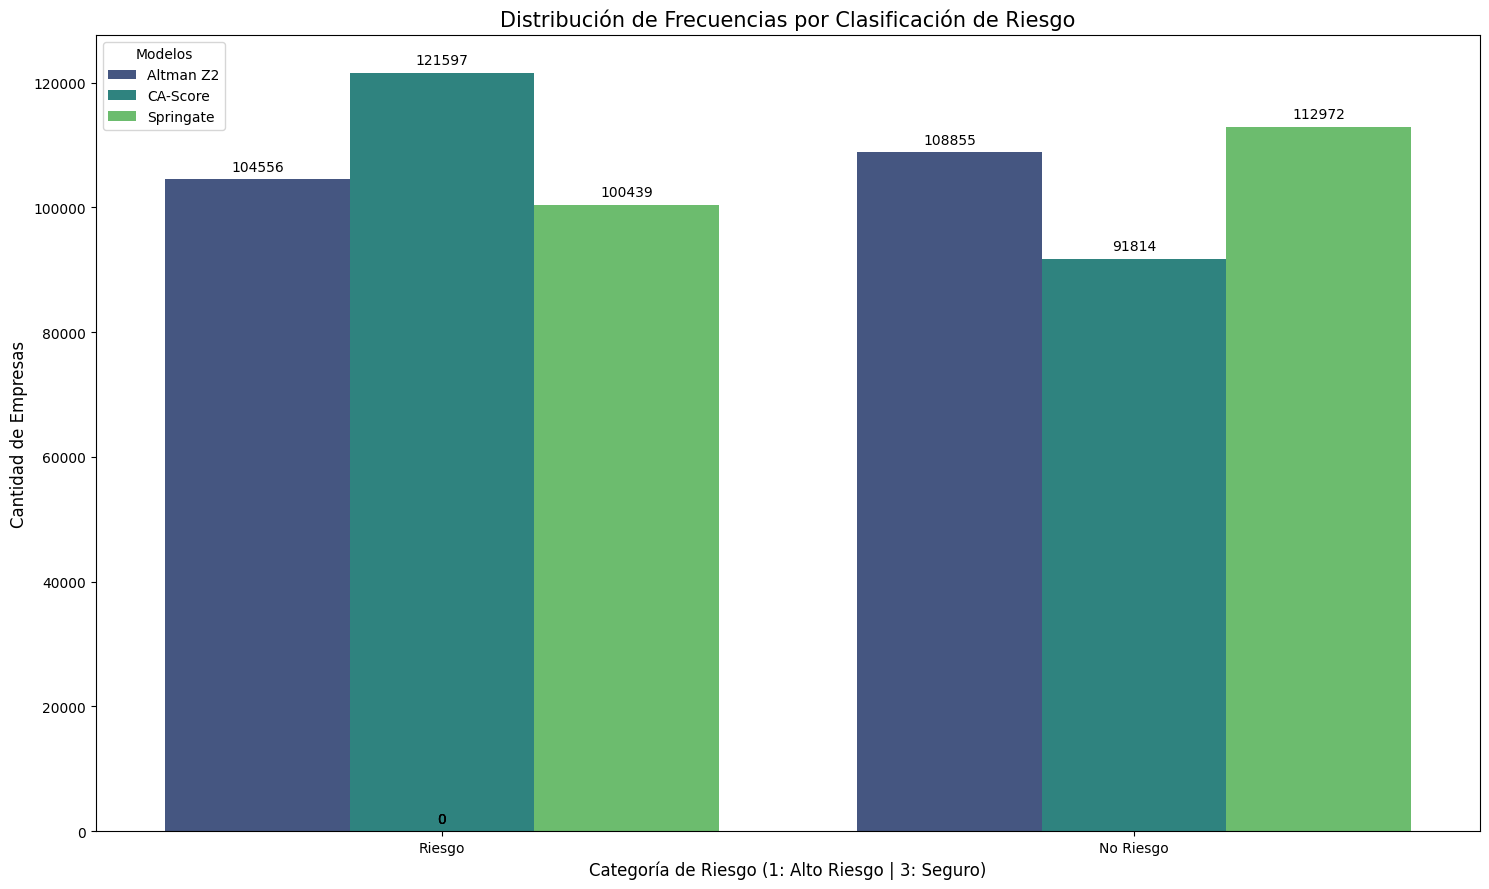

In [113]:
# 1. Preparar los datos para graficar (formato largo)
modelos_bin = ['Z2_Bin', 'CA_Bin', 'Springate_Bin']
nombres_amigables = ['Altman Z2', 'CA-Score', 'Springate']

# Crear un DataFrame temporal para el gráfico
df_plot = df_modelado[modelos_bin].melt(var_name='Modelo', value_name='Categoria')

# 2. Configurar el gráfico
plt.figure(figsize=(15, 9))
ax = sns.countplot(data=df_plot, x='Categoria', hue='Modelo', palette='viridis')

# 3. Personalizar etiquetas y diseño
plt.title('Distribución de Frecuencias por Clasificación de Riesgo', fontsize=15)
plt.xlabel('Categoría de Riesgo (1: Alto Riesgo | 3: Seguro)', fontsize=12)
plt.ylabel('Cantidad de Empresas', fontsize=12)
plt.legend(title='Modelos', labels=nombres_amigables)

# Añadir etiquetas de conteo sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=10)

plt.tight_layout()
plt.show()

# Empresas en Quiebra y Empresas Falsa Alarma

(0.0, 70.0)

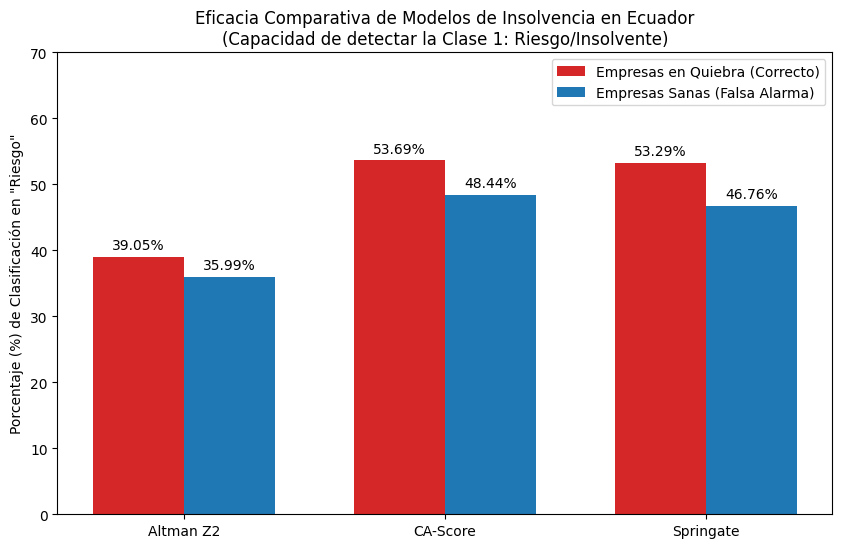

In [114]:
# Preparar los datos basados en tus resultados (Categoría 1 = Riesgo/No Saludable)
modelos = ['Altman Z2', 'CA-Score', 'Springate']
sensibilidad_quiebra = [39.05, 53.69, 53.29] # % de empresas en quiebra detectadas
falsas_alarmas_sanas = [35.99, 48.44, 46.76] # % de empresas sanas marcadas como riesgo

x = np.arange(len(modelos))  # Localización de las etiquetas
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

# Crear las barras
rects1 = ax.bar(x - width/2, sensibilidad_quiebra, width, label='Empresas en Quiebra (Correcto)', color='#d62728')
rects2 = ax.bar(x + width/2, falsas_alarmas_sanas, width, label='Empresas Sanas (Falsa Alarma)', color='#1f77b4')

# Añadir textos y etiquetas
ax.set_ylabel('Porcentaje (%) de Clasificación en "Riesgo"')
ax.set_title('Eficacia Comparativa de Modelos de Insolvencia en Ecuador\n(Capacidad de detectar la Clase 1: Riesgo/Insolvente)')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()

# Añadir etiquetas de valor sobre las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 70) # Ajust

# Distribución de Frecuencias por Clasificación de Riesgo

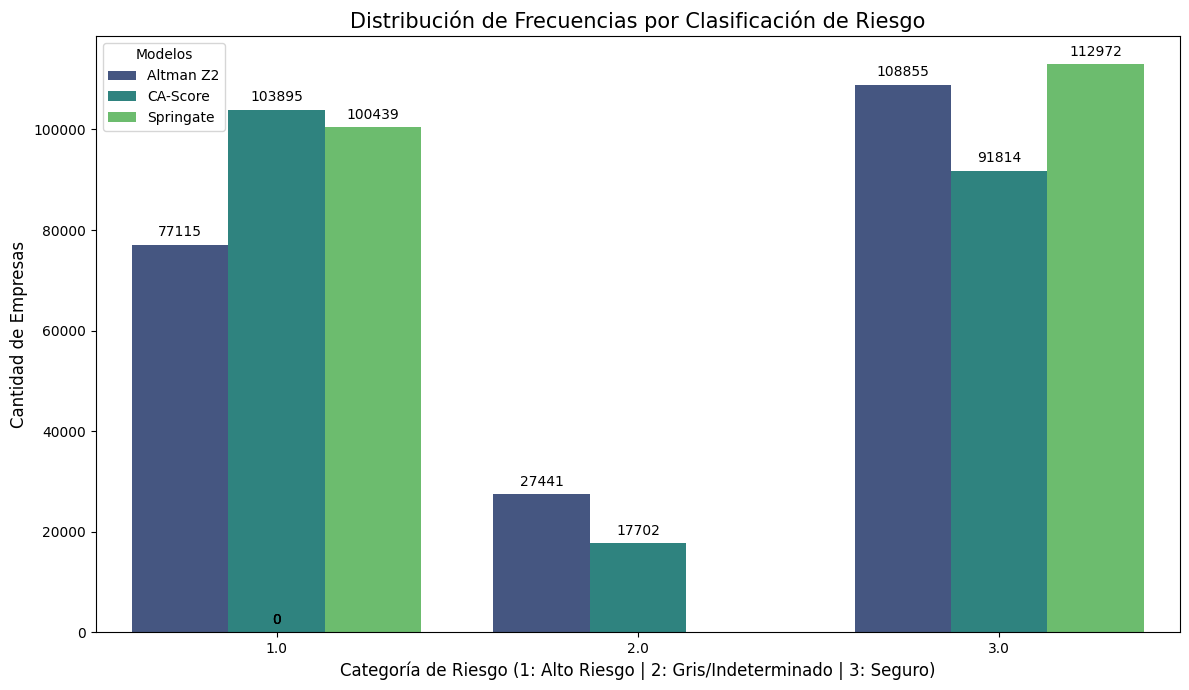

In [165]:
# 1. Preparar los datos para graficar (formato largo)
modelos_cat = ['Z2_Cat', 'CA_Cat', 'Springate_Cat']
nombres_amigables = ['Altman Z2', 'CA-Score', 'Springate']

# Crear un DataFrame temporal para el gráfico
df_plot = df_modelado[modelos_cat].melt(var_name='Modelo', value_name='Categoria')

# 2. Configurar el gráfico
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df_plot, x='Categoria', hue='Modelo', palette='viridis')

# 3. Personalizar etiquetas y diseño
plt.title('Distribución de Frecuencias por Clasificación de Riesgo', fontsize=15)
plt.xlabel('Categoría de Riesgo (1: Alto Riesgo | 2: Gris/Indeterminado | 3: Seguro)', fontsize=12)
plt.ylabel('Cantidad de Empresas', fontsize=12)
plt.legend(title='Modelos', labels=nombres_amigables)

# Añadir etiquetas de conteo sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=10)

plt.tight_layout()
plt.show()

In [116]:
df_modelado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213411 entries, 0 to 213410
Data columns (total 88 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   anio                       213411 non-null  int64  
 1   expediente                 213411 non-null  int64  
 2   posicion_general           213411 non-null  float64
 3   cia_imvalores              213411 non-null  int64  
 4   id_estado_financiero       213411 non-null  float64
 5   ingresos_ventas            213411 non-null  float64
 6   activos                    213411 non-null  float64
 7   patrimonio                 213411 non-null  float64
 8   utilidad_an_imp            213411 non-null  float64
 9   impuesto_renta             213411 non-null  float64
 10  n_empleados                213411 non-null  float64
 11  ingresos_totales           213411 non-null  float64
 12  utilidad_ejercicio         213411 non-null  float64
 13  utilidad_neta              21

In [138]:
# Cuenta el total de valores nulos en la columna
nulos_springate = df_modelado['Springate_Score'].isnull().sum()
print(f"Valores nulos en Springate_Score: {nulos_springate}")

# También verifica si hay valores infinitos (que a veces causan el mismo error)
import numpy as np
infinitos_springate = np.isinf(df['Springate_Score']).sum()
print(f"Valores infinitos en Springate_Score: {infinitos_springate}")

Valores nulos en Springate_Score: 0
Valores infinitos en Springate_Score: 3527


In [140]:
# 1. Convertimos los infinitos (inf y -inf) en valores nulos (NaN) temporalmente
df_modelado.replace([np.inf, -np.inf], np.nan, inplace=True)

# 2. Eliminamos todas las filas que tengan valores nulos en CUALQUIER columna
# Esto garantiza que no existan datos faltantes en ninguna variable para tus pruebas
df_limpio = df.dropna()

# 3. Verificamos cuántos datos quedaron
print(f"Registros originales: {len(df)}")
print(f"Registros después de la limpieza: {len(df_limpio)}")
print(f"Filas eliminadas: {len(df) - len(df_limpio)}")

Registros originales: 213411
Registros después de la limpieza: 209884
Filas eliminadas: 3527


In [158]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209884 entries, 0 to 213410
Data columns (total 82 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   anio                       209884 non-null  int64  
 1   expediente                 209884 non-null  int64  
 2   posicion_general           209884 non-null  float64
 3   cia_imvalores              209884 non-null  int64  
 4   id_estado_financiero       209884 non-null  float64
 5   ingresos_ventas            209884 non-null  float64
 6   activos                    209884 non-null  float64
 7   patrimonio                 209884 non-null  float64
 8   utilidad_an_imp            209884 non-null  float64
 9   impuesto_renta             209884 non-null  float64
 10  n_empleados                209884 non-null  float64
 11  ingresos_totales           209884 non-null  float64
 12  utilidad_ejercicio         209884 non-null  float64
 13  utilidad_neta              209884 

# Comparación de la Capacidad de Detección de Riesgo por Modelo

In [141]:
def graficar_sensibilidad_comparada(df_micro, df_peq):
    # Calcular porcentajes de riesgo por segmento
    data = []
    for df, seg_name in [(df_micro, 'Micro'), (df_peq, 'Pequeña')]:
        data.append({'Segmento': seg_name, 'Modelo': 'Altman Z2', 'Riesgo %': (df['Z2_Bin'] == 'Riesgo').mean() * 100})
        data.append({'Segmento': seg_name, 'Modelo': 'CA-Score', 'Riesgo %': (df['CA_Bin'] == 'Riesgo').mean() * 100})
        data.append({'Segmento': seg_name, 'Modelo': 'Springate', 'Riesgo %': (df['Springate_Bin'] == 'Riesgo').mean() * 100})

    df_plot = pd.DataFrame(data)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Segmento', y='Riesgo %', hue='Modelo', data=df_plot, palette='viridis')

    plt.title('Comparación de la Capacidad de Detección de Riesgo por Modelo', fontsize=14)
    plt.ylabel('Porcentaje de Empresas en Riesgo (%)')
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir etiquetas de porcentaje sobre las barras
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.1f}%',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha = 'center', va = 'center',
                           xytext = (0, 9),
                           textcoords = 'offset points')

    plt.show()

# Función de Análisis por Segmento

# Comparación de capacidad de detección por riesgo por modelo

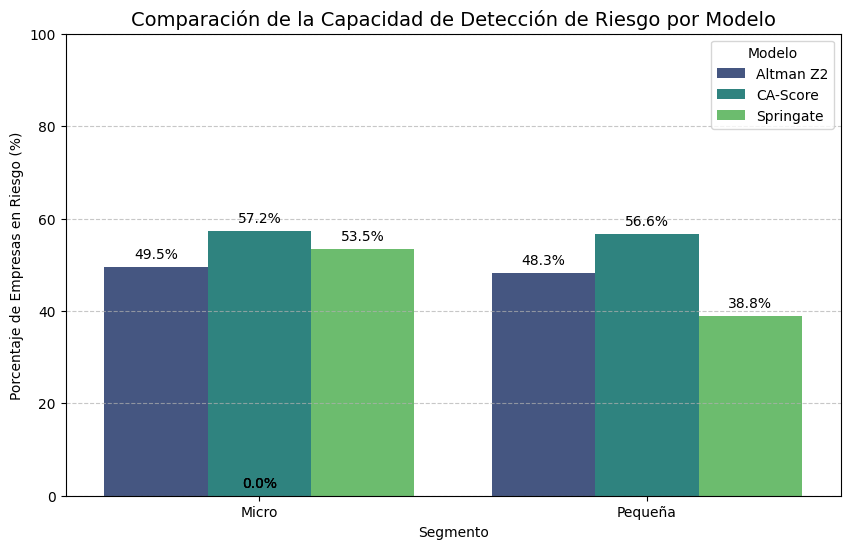

In [159]:
# Llamar a la función después de que df_micro y df_pequena hayan sido definidos
graficar_sensibilidad_comparada(df_micro, df_pequena)

# Tabla de Contingencia

In [171]:
df_limpio = df_modelado.copy()

In [172]:
# Contamos cuántas empresas están realmente en quiebra (target == 1)
total_quiebras = df_limpio[df_limpio['target'] == 1].shape[0]

# Calculamos aciertos por modelo
aciertos_z2 = df_limpio[(df_limpio['target'] == 1) & (df_limpio['Z2 Score'] < 1.1)].shape[0]
aciertos_ca = df_limpio[(df_limpio['target'] == 1) & (df_limpio['CA_Score'] < 0)].shape[0]
aciertos_springate = df_limpio[(df_limpio['target'] == 1) & (df_limpio['Springate_Score'] < 0.862)].shape[0]

print(f"Total empresas quebradas: {total_quiebras}")
print(f"Z2 detectó: {aciertos_z2}")
print(f"CA detectó: {aciertos_ca}")
print(f"Springate detectó: {aciertos_springate}")

Total empresas quebradas: 9948
Z2 detectó: 3885
CA detectó: 5731
Springate detectó: 5242


In [173]:
# 1. Definir totales reales de la variable target original
total_quiebras = df_limpio[df_limpio['target'] == 1].shape[0]
total_no_quiebras = df_limpio[df_limpio['target'] == 0].shape[0]

# 2. Cálculos para Altman Z2-Score (Umbral < 1.1)
aciertos_q_z2 = df_limpio[(df_limpio['target'] == 1) & (df_limpio['Z2 Score'] < 1.1)].shape[0]
aciertos_no_q_z2 = df_limpio[(df_limpio['target'] == 0) & (df_limpio['Z2 Score'] >= 1.1)].shape[0]

# 3. Cálculos para CA-Score (Umbral < 0)
aciertos_q_ca = df_limpio[(df_limpio['target'] == 1) & (df_limpio['CA_Score'] < 0)].shape[0]
aciertos_no_q_ca = df_limpio[(df_limpio['target'] == 0) & (df_limpio['CA_Score'] >= 0)].shape[0]

# 4. Cálculos para Springate Score (Umbral < 0.862)
aciertos_q_springate = df_limpio[(df_limpio['target'] == 1) & (df_limpio['Springate_Score'] < 0.862)].shape[0]
aciertos_no_q_springate = df_limpio[(df_limpio['target'] == 0) & (df_limpio['Springate_Score'] >= 0.862)].shape[0]

# --- PRESENTACIÓN DE RESULTADOS ---
print(f"RESUMEN DE LA BASE ORIGINAL")
print(f"Total Quiebras (1): {total_quiebras} | Total No Quiebras (0): {total_no_quiebras}\n")

data = {
    "Modelo": ["Z2 Score", "CA_Score", "Springate"],
    "Aciertos Quiebra (1)": [aciertos_q_z2, aciertos_q_ca, aciertos_q_springate],
    "Aciertos No Quiebra (0)": [aciertos_no_q_z2, aciertos_no_q_ca, aciertos_no_q_springate],
    "% Sensibilidad (Acierto 1)": [aciertos_q_z2/total_quiebras*100, aciertos_q_ca/total_quiebras*100, aciertos_q_springate/total_quiebras*100],
    "% Especificidad (Acierto 0)": [aciertos_no_q_z2/total_no_quiebras*100, aciertos_no_q_ca/total_no_quiebras*100, aciertos_no_q_springate/total_no_quiebras*100]
}

df_comparativa = pd.DataFrame(data)
print(df_comparativa.to_string(index=False))

RESUMEN DE LA BASE ORIGINAL
Total Quiebras (1): 9948 | Total No Quiebras (0): 203463

   Modelo  Aciertos Quiebra (1)  Aciertos No Quiebra (0)  % Sensibilidad (Acierto 1)  % Especificidad (Acierto 0)
 Z2 Score                  3885                   130233                   39.053076                    64.008198
 CA_Score                  5731                    96260                   57.609570                    47.310813
Springate                  5242                   105942                   52.694009                    52.069418


In [174]:
# 1. Definimos las funciones de categorización según la literatura
def cat_z2(score):
    if score < 1.1: return 'Categoría 1 (Riesgo Alto)'
    if 1.1 <= score <= 2.6: return 'Categoría 2 (Zona Gris)'
    return 'Categoría 3 (Riesgo Bajo)'

def cat_ca(score):
    if score < 0: return 'Categoría 1 (Riesgo Alto)'
    if 0 <= score <= 0.5: return 'Categoría 2 (Zona Gris)'
    return 'Categoría 3 (Riesgo Bajo)'

def cat_springate(score):
    if score < 0.862: return 'Categoría 1 (Riesgo Alto)'
    return 'Categoría 3 (Riesgo Bajo)' # Springate no suele tener Zona Gris estándar

# 2. Aplicamos las categorías al dataframe original (df_limpio)
df_limpio['Cat_Z2'] = df_limpio['Z2 Score'].apply(cat_z2)
df_limpio['Cat_CA'] = df_limpio['CA_Score'].apply(cat_ca)
df_limpio['Cat_Springate'] = df_limpio['Springate_Score'].apply(cat_springate)

# 3. Función para calcular la tabla de porcentajes
def obtener_fila_tabla(df, columna_cat, nombre_modelo):
    # Calculamos para Sana (0) y Quiebra (1)
    tabla = df.groupby(['target', columna_cat]).size().unstack(fill_value=0)
    # Convertimos a porcentajes por fila (Estado Legal)
    tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100

    # Renombrar índices para que coincidan con tu imagen
    tabla_pct.index = ['Sana (0.0)', 'Quiebra (1.0)']
    tabla_pct.insert(0, 'Modelo', nombre_modelo)
    return tabla_pct

# 4. Construimos la tabla final
res_z2 = obtener_fila_tabla(df_limpio, 'Cat_Z2', 'Altman Z2')
res_ca = obtener_fila_tabla(df_limpio, 'Cat_CA', 'CA-Score')
res_springate = obtener_fila_tabla(df_limpio, 'Cat_Springate', 'Springate')

# Unimos todo y formateamos
tabla_final = pd.concat([res_z2, res_ca, res_springate])
print(tabla_final.to_string())

                  Modelo  Categoría 1 (Riesgo Alto)  Categoría 2 (Zona Gris)  Categoría 3 (Riesgo Bajo)
Sana (0.0)     Altman Z2                  35.991802                12.927166                  51.081032
Quiebra (1.0)  Altman Z2                  39.053076                13.238842                  47.708082
Sana (0.0)      CA-Score                  52.689187                 6.742749                  40.568064
Quiebra (1.0)   CA-Score                  57.609570                 5.518697                  36.871733
Sana (0.0)     Springate                  46.287040                      NaN                  53.712960
Quiebra (1.0)  Springate                  52.694009                      NaN                  47.305991


# SUPUESTOS ESTADISTICOS

**Prueba de Normalidad**

--- RESULTADOS DE LA PRUEBA DE LEVENE (HOMOCEDASTICIDAD) ---
Z2 Score: Estadístico=0.2625, P-Value=6.0843e-01


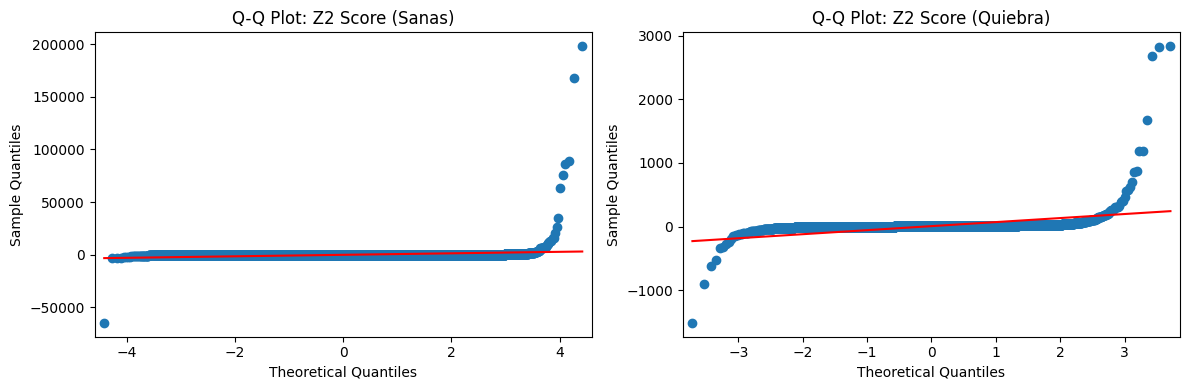

CA_Score: Estadístico=0.1209, P-Value=7.2802e-01


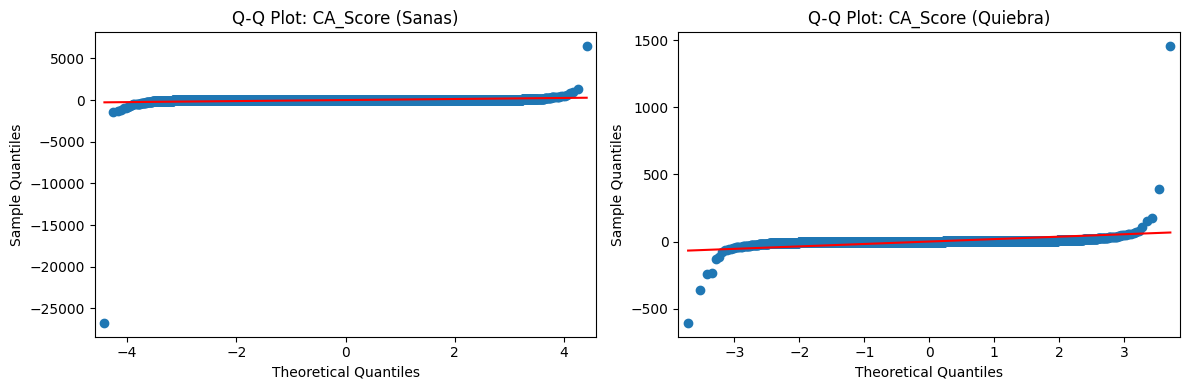

Springate_Score: Estadístico=0.2339, P-Value=6.2867e-01


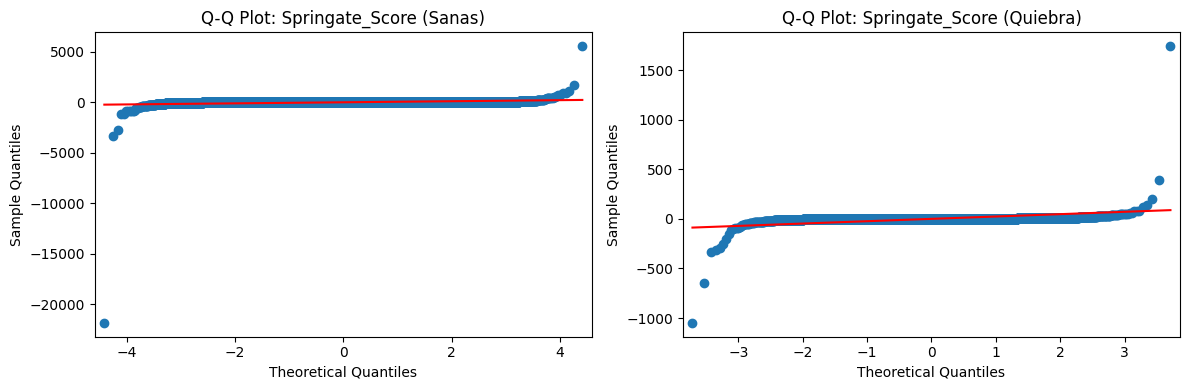

In [164]:
import statsmodels.api as sm

# Lista de modelos a evaluar
modelos = ['Z2 Score', 'CA_Score', 'Springate_Score']

print("--- RESULTADOS DE LA PRUEBA DE LEVENE (HOMOCEDASTICIDAD) ---")

for mod in modelos:
    # Segmentar grupos
    sanas = df_limpio[df_limpio['target'] == 0][mod]
    quiebra = df_limpio[df_limpio['target'] == 1][mod]

    # 1. Prueba de Levene
    stat_lev, p_lev = stats.levene(sanas, quiebra)
    print(f"{mod}: Estadístico={stat_lev:.4f}, P-Value={p_lev:.4e}")

    # 2. Gráficos Q-Q (Normalidad)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    sm.qqplot(sanas, line='s', ax=ax1)
    ax1.set_title(f'Q-Q Plot: {mod} (Sanas)')

    sm.qqplot(quiebra, line='s', ax=ax2)
    ax2.set_title(f'Q-Q Plot: {mod} (Quiebra)')

    plt.tight_layout()
    plt.show()

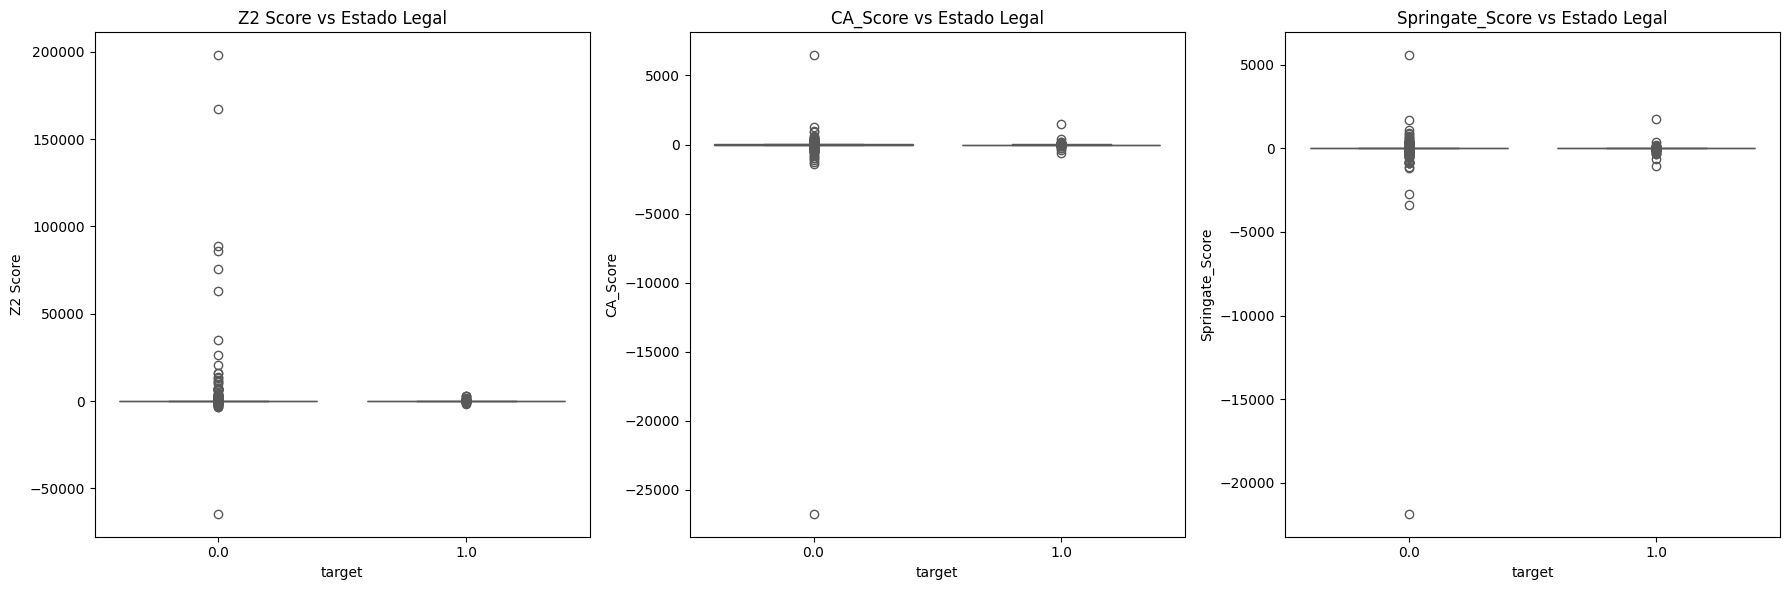

In [145]:
# Crear una figura con 3 subgráficos para comparar los modelos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot para Z2 Score
sns.boxplot(ax=axes[0], x='target', y='Z2 Score', data=df_limpio, palette='Set2')
axes[0].set_title('Z2 Score vs Estado Legal')

# Boxplot para CA_Score
sns.boxplot(ax=axes[1], x='target', y='CA_Score', data=df_limpio, palette='Set2')
axes[1].set_title('CA_Score vs Estado Legal')

# Boxplot para Springate_Score
sns.boxplot(ax=axes[2], x='target', y='Springate_Score', data=df_limpio, palette='Set2')
axes[2].set_title('Springate_Score vs Estado Legal')

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

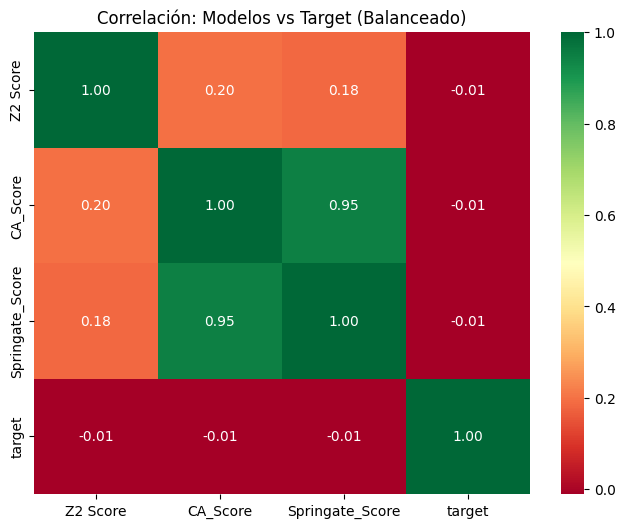

Levene Z2 Score: P-Value = 0.5613
Levene CA_Score: P-Value = 0.1439
Levene Springate_Score: P-Value = 0.3381


In [156]:
from sklearn.utils import resample
from scipy.stats import levene
import seaborn as sns
import matplotlib.pyplot as plt

# --- PASO 1: BALANCEO (Undersampling) ---
df_quiebra = df_limpio[df_limpio['target'] == 1]
df_no_quiebra = df_limpio[df_limpio['target'] == 0]

df_no_q_balanced = resample(df_no_quiebra,
                             replace=False,
                             n_samples=len(df_quiebra),
                             random_state=42)

df_final = pd.concat([df_no_q_balanced, df_quiebra])

plt.figure(figsize=(8, 6))

# --- PASO 2: MATRIZ DE CORRELACIÓN SELECCIONADA ---
plt.figure(figsize=(8, 6))

# Definimos exactamente las columnas que nos interesan
columnas_interes = ['Z2 Score', 'CA_Score', 'Springate_Score', 'target']

# Creamos la matriz solo con esas columnas del dataframe balanceado
matriz_especifica = df_final[columnas_interes].corr()

# Dibujamos el mapa de calor
sns.heatmap(matriz_especifica, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Correlación: Modelos vs Target (Balanceado)')
plt.show()

# --- PASO 3: NUEVA PRUEBA DE LEVENE ---
for col in ['Z2 Score', 'CA_Score', 'Springate_Score']:
    g0 = df_final[df_final['target'] == 0][col]
    g1 = df_final[df_final['target'] == 1][col]
    stat, p_val = levene(g0, g1)
    print(f"Levene {col}: P-Value = {p_val:.4f}")

**Mapa de calor**

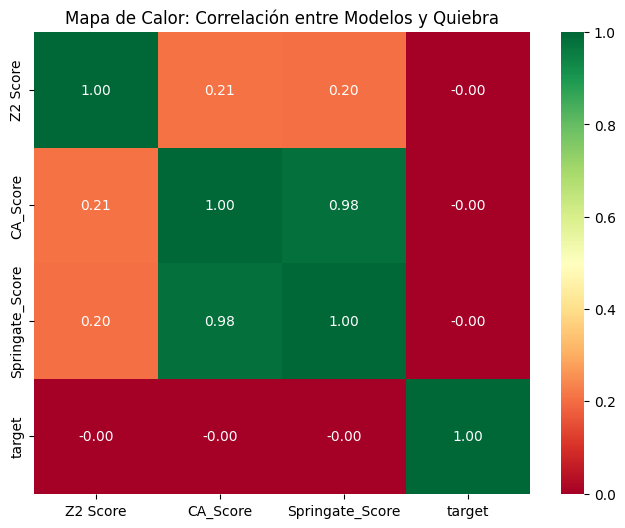

In [153]:
# Seleccionamos los scores y el target
cols_analisis = ['Z2 Score', 'CA_Score', 'Springate_Score', 'target']
corr = df_limpio[cols_analisis].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Mapa de Calor: Correlación entre Modelos y Quiebra')
plt.show()

# Eficacia de los modelos de predicción de quiebra con la variable target

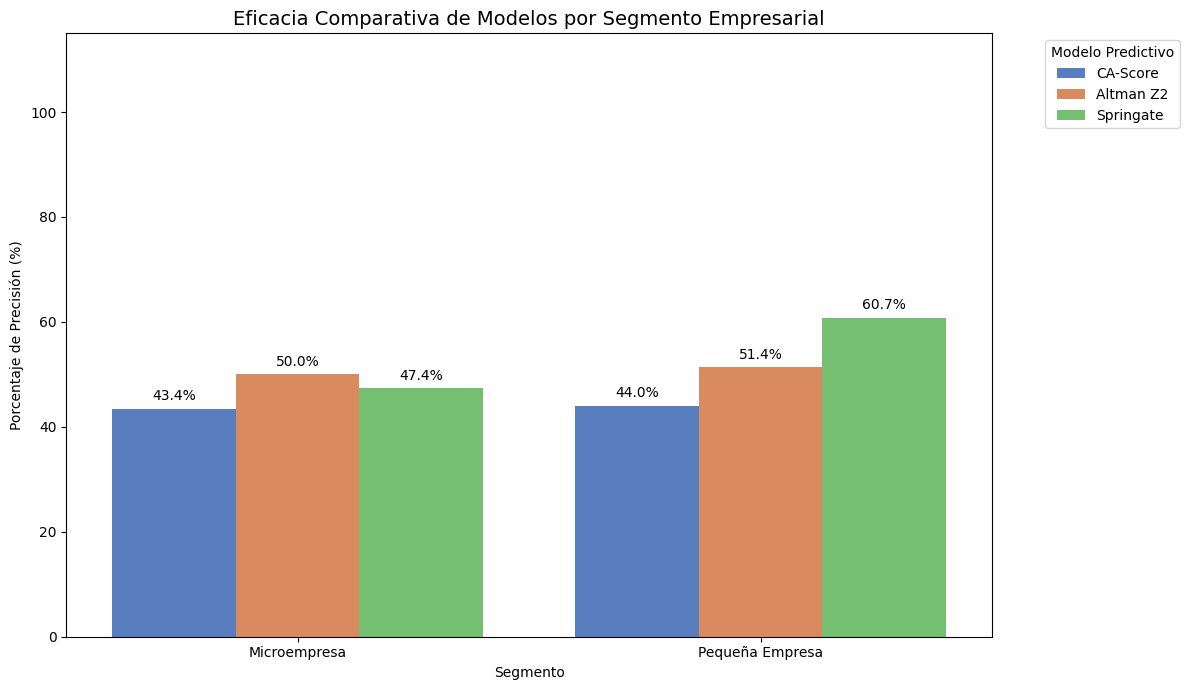

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Definir los aciertos para los tres modelos
# Nota: Asumimos que 1 = Riesgo y 3 = Seguro. Target 1 = Quiebra y 0 = Sana.
df_limpio['Acierto_CA'] = ((df_limpio['CA_Cat'] == 1) & (df_limpio['target'] == 1)) | \
                             ((df_limpio['CA_Cat'] == 3) & (df_limpio['target'] == 0))

df_limpio['Acierto_Z2'] = ((df_limpio['Z2_Cat'] == 1) & (df_limpio['target'] == 1)) | \
                             ((df_limpio['Z2_Cat'] == 3) & (df_limpio['target'] == 0))

df_limpio['Acierto_Springate'] = ((df_limpio['Springate_Cat'] == 1) & (df_limpio['target'] == 1)) | \
                                    ((df_limpio['Springate_Cat'] == 3) & (df_limpio['target'] == 0))

# 2. Mapear segmentos
segmento_map = {1.0: 'Microempresa', 2.0: 'Pequeña Empresa'}
df_limpio['Segmento_Nom'] = df_limpio['cod_segmento'].map(segmento_map)

# 3. Calcular promedios de acierto por segmento para los tres modelos
efectividad_tri = df_limpio.groupby('Segmento_Nom')[['Acierto_CA', 'Acierto_Z2', 'Acierto_Springate']].mean() * 100

# 4. Transformar datos para graficar (Formato Largo)
efectividad_reseteada = efectividad_tri.reset_index().melt(id_vars='Segmento_Nom',
                                                          var_name='Modelo',
                                                          value_name='Precision')

# Limpiar nombres de modelos para la leyenda
efectividad_reseteada['Modelo'] = efectividad_reseteada['Modelo'].replace({
    'Acierto_CA': 'CA-Score',
    'Acierto_Z2': 'Altman Z2',
    'Acierto_Springate': 'Springate'
})

# 5. Graficar
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=efectividad_reseteada, x='Segmento_Nom', y='Precision', hue='Modelo', palette='muted')

# Añadir etiquetas de porcentaje
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10)

plt.title('Eficacia Comparativa de Modelos por Segmento Empresarial', fontsize=14)
plt.ylabel('Porcentaje de Precisión (%)')
plt.xlabel('Segmento')
plt.ylim(0, 115)
plt.legend(title='Modelo Predictivo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# TEST MCNEMAR


In [160]:
import pandas as pd
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar

# --- PASO 1: Categorización Binaria (Riesgo vs No Riesgo) ---
# Usamos default='Desconocido' para evitar el TypeError de mezcla de tipos

# Altman Z2: Riesgo si < 2.59 (Incluye zona gris y quiebra)
df_modelado['Z2_Bin'] = np.select(
    [(df_modelado['Z2 Score'] < 2.59), (df_modelado['Z2 Score'] >= 2.59)],
    ['Riesgo', 'No Riesgo'], default='Desconocido'
)

# CA-Score: Riesgo si < 0.3 (Incluye zona indeterminada y riesgo máximo)
df_modelado['CA_Bin'] = np.select(
    [(df_modelado['CA_Score'] < 0.3), (df_modelado['CA_Score'] >= 0.3)],
    ['Riesgo', 'No Riesgo'], default='Desconocido'
)

# Springate: Riesgo si <= 0.862 (Insolvente)
df_modelado['Springate_Bin'] = np.select(
    [(df_modelado['Springate_Score'] <= 0.862), (df_modelado['Springate_Score'] > 0.862)],
    ['Riesgo', 'No Riesgo'], default='Desconocido'
)

In [161]:
# --- PASO 2: Función de Análisis por Segmento ---
def realizar_analisis_mcnemar(df, nombre_segmento):
    print(f"\n" + "="*60)
    print(f" ANÁLISIS ESTADÍSTICO: {nombre_segmento} ")
    print("="*60)

    comparaciones = [
        ('Z2_Bin', 'CA_Bin', 'Altman Z2 vs CA-Score'),
        ('Springate_Bin', 'CA_Bin', 'Springate vs CA-Score')
    ]

    for mod1, mod2, titulo in comparaciones:
        # Crear matriz de confusión (Tabla de contingencia)
        tabla = pd.crosstab(df[mod1], df[mod2])

        print(f"\n[+] {titulo}")
        print("Tabla de Contingencia (Acuerdos y Desacuerdos):")
        print(tabla)

        # Ejecutar Test de McNemar (Sustituye al ANOVA para datos pareados)
        if tabla.shape == (2, 2):
            # exact=False para muestras grandes (>30), correction=True para Edwards
            resultado = mcnemar(tabla, exact=False, correction=True)

            print(f"P-Value: {resultado.pvalue:.4e}")
            if resultado.pvalue < 0.05:
                print(">>> CONCLUSIÓN: Diferencia significativa. Los modelos NO clasifican igual.")
            else:
                print(">>> CONCLUSIÓN: Sin diferencia significativa. Los modelos convergen.")
        else:
            print("[!] Advertencia: La tabla no es 2x2. Verifique si el segmento tiene ambas categorías.")

# --- PASO 3: Ejecución Segmentada ---
# Segmento 1.0: Micro Empresa
df_micro = df_modelado[df_modelado['cod_segmento'] == 1.0].copy()
realizar_analisis_mcnemar(df_micro, "MICRO EMPRESAS (cod_segmento 1.0)")

# Segmento 2.0: Pequeña Empresa
df_pequena = df_modelado[df_modelado['cod_segmento'] == 2.0].copy()
realizar_analisis_mcnemar(df_pequena, "PEQUEÑAS EMPRESAS (cod_segmento 2.0)")


 ANÁLISIS ESTADÍSTICO: MICRO EMPRESAS (cod_segmento 1.0) 

[+] Altman Z2 vs CA-Score
Tabla de Contingencia (Acuerdos y Desacuerdos):
CA_Bin     No Riesgo  Riesgo
Z2_Bin                      
No Riesgo      47021   13493
Riesgo          4240   55138
P-Value: 0.0000e+00
>>> CONCLUSIÓN: Diferencia significativa. Los modelos NO clasifican igual.

[+] Springate vs CA-Score
Tabla de Contingencia (Acuerdos y Desacuerdos):
CA_Bin         No Riesgo  Riesgo
Springate_Bin                   
Desconocido          810    2153
No Riesgo          39932   13804
Riesgo             10519   52674
[!] Advertencia: La tabla no es 2x2. Verifique si el segmento tiene ambas categorías.

 ANÁLISIS ESTADÍSTICO: PEQUEÑAS EMPRESAS (cod_segmento 2.0) 

[+] Altman Z2 vs CA-Score
Tabla de Contingencia (Acuerdos y Desacuerdos):
CA_Bin     No Riesgo  Riesgo
Z2_Bin                      
No Riesgo      35382   12959
Riesgo          5171   40007
P-Value: 0.0000e+00
>>> CONCLUSIÓN: Diferencia significativa. Los modelos NO

In [162]:
# Ejecutar el test
resultado = mcnemar(tabla_contingencia, exact=False, correction=True)

print(f"\nEstadístico de McNemar: {resultado.statistic:.4f}")
print(f"P-Value: {resultado.pvalue:.4e}")

if resultado.pvalue < 0.05:
    print("Conclusión: Existe una diferencia significativa en la clasificación de los modelos.")
else:
    print("Conclusión: No hay evidencia de diferencias significativas en la clasificación.")


Estadístico de McNemar: 8096.4113
P-Value: 0.0000e+00
Conclusión: Existe una diferencia significativa en la clasificación de los modelos.


# Matriz de confusión

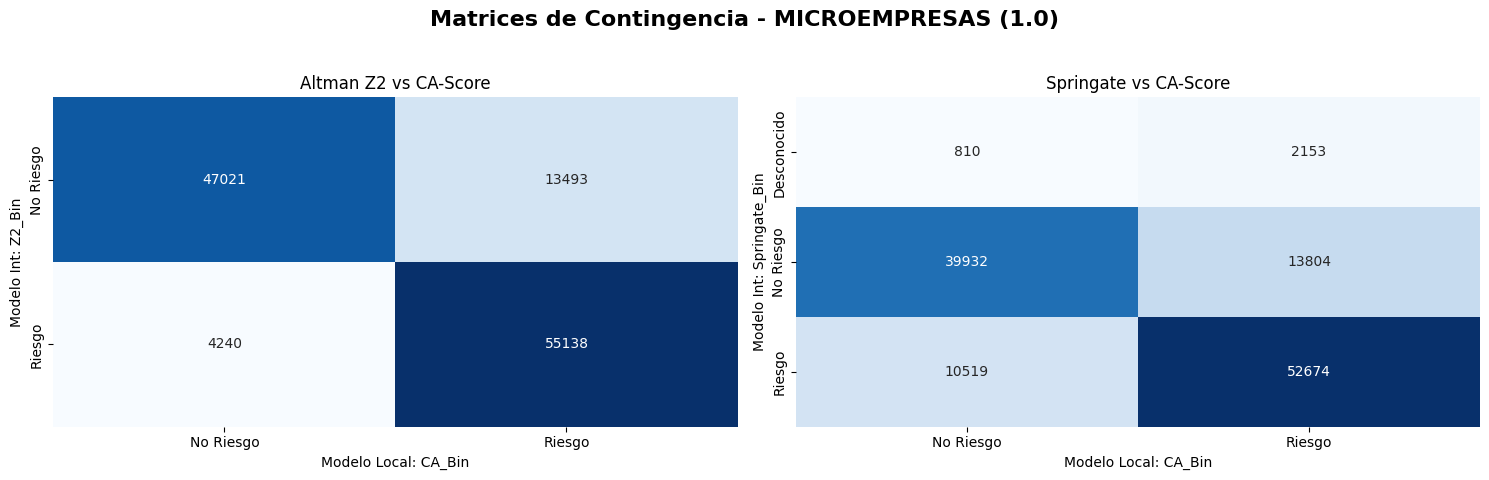

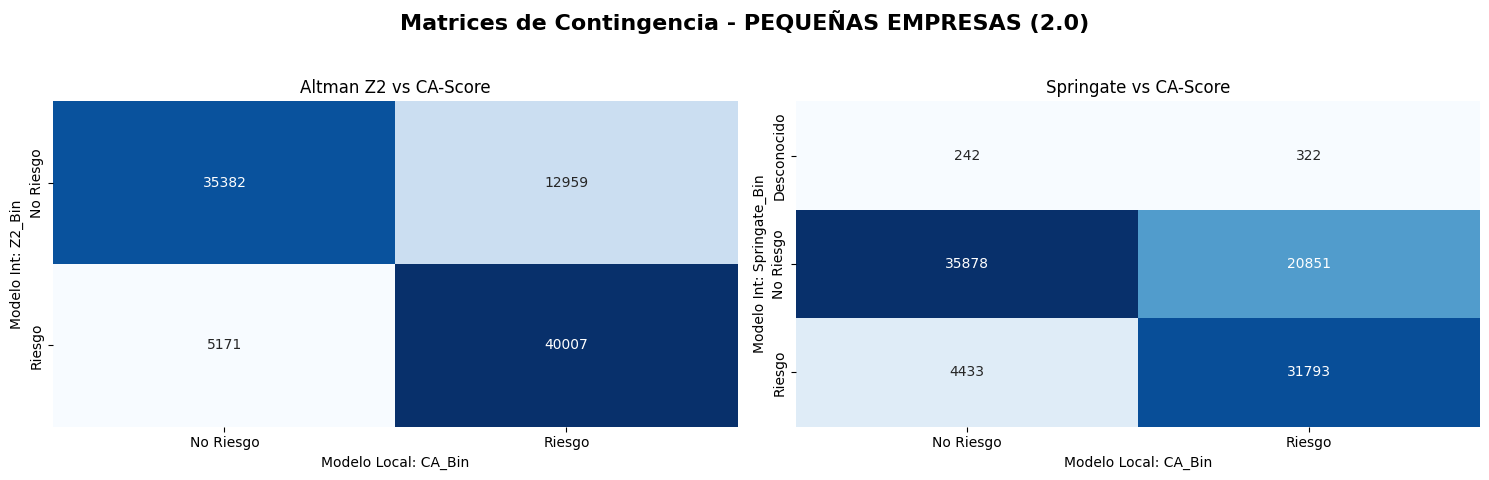

In [163]:
def graficar_resultados_tesis(df_seg, nombre_segmento):
    # Definir las comparaciones
    comparaciones = [
        ('Z2_Bin', 'CA_Bin', 'Altman Z2 vs CA-Score'),
        ('Springate_Bin', 'CA_Bin', 'Springate vs CA-Score')
    ]

    # Crear una figura con dos subplots para los mapas de calor
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Matrices de Contingencia - {nombre_segmento}', fontsize=16, fontweight='bold')

    for i, (m1, m2, titulo) in enumerate(comparaciones):
        # Crear tabla de contingencia
        tabla = pd.crosstab(df_seg[m1], df_seg[m2])

        # Graficar Heatmap
        sns.heatmap(tabla, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
        axes[i].set_title(titulo, fontsize=12)
        axes[i].set_xlabel(f'Modelo Local: {m2}')
        axes[i].set_ylabel(f'Modelo Int: {m1}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Ejecutar para cada segmento
graficar_resultados_tesis(df_micro, "MICROEMPRESAS (1.0)")
graficar_resultados_tesis(df_pequena, "PEQUEÑAS EMPRESAS (2.0)")